In [164]:
%matplotlib inline
import spacy
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from spacy.tokenizer import Tokenizer
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import HashingVectorizer

In [130]:
FOLDER = "/home/oscar/GitHub/test_used_tl_ML/data/"

In [131]:
df_num = pd.read_pickle(FOLDER + "df_num_norm.pkl")

In [132]:
df_num.tail()

,listing_type_id_bronze,listing_type_id_free,listing_type_id_gold,listing_type_id_gold_premium,listing_type_id_gold_pro,listing_type_id_gold_special,listing_type_id_silver,available_quantity_False,price_norm
95950,1,0,0,0,0,0,0,1,0.041719
95951,0,1,0,0,0,0,0,1,0.002916
95952,1,0,0,0,0,0,0,1,0.023818
95953,1,0,0,0,0,0,0,1,0.059921
95954,1,0,0,0,0,0,0,1,0.004916


In [133]:
len(df_num.columns)

9

In [134]:
pca_pipe = make_pipeline(PCA())
pca_pipe.fit(df_num)
modelo_pca = pca_pipe.named_steps['pca']

In [135]:
pd.DataFrame(data=modelo_pca.components_,
             columns=df_num.columns,
             index=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9'])

,listing_type_id_bronze,listing_type_id_free,listing_type_id_gold,listing_type_id_gold_premium,listing_type_id_gold_pro,listing_type_id_gold_special,listing_type_id_silver,available_quantity_False,price_norm
PC1,-0.786583,0.604574,0.025415,0.006042,0.000181,0.036658,0.113713,-1.156227e-02,2.622833e-02
PC2,0.010188,-0.005600,-0.002437,-0.001361,0.000127,0.000157,-0.001073,-9.999275e-01,9.326033e-04
PC3,-0.335126,-0.583479,0.068632,0.014496,0.000417,0.106742,0.728317,-1.078111e-03,2.194643e-02
PC4,-0.253188,-0.296681,0.276743,0.037662,0.001004,0.723942,-0.489483,-9.310170e-04,7.863647e-02
PC5,-0.106290,-0.114468,0.837813,0.028186,0.000653,-0.500218,-0.145677,-2.479547e-03,-3.779825e-02
PC6,0.039328,0.011209,0.001234,0.023575,0.000997,-0.085356,0.009013,1.208035e-03,9.951890e-01
PC7,-0.160198,-0.162730,-0.222413,0.910513,0.004072,-0.197852,-0.171392,-1.291524e-03,-2.854903e-02
PC8,-0.152990,-0.153053,-0.154255,-0.158404,0.925810,-0.153830,-0.153278,1.467157e-04,-1.019665e-03
PC9,-0.377964,-0.377964,-0.377964,-0.377964,-0.377964,-0.377964,-0.377964,-1.647987e-17,-1.387779e-17


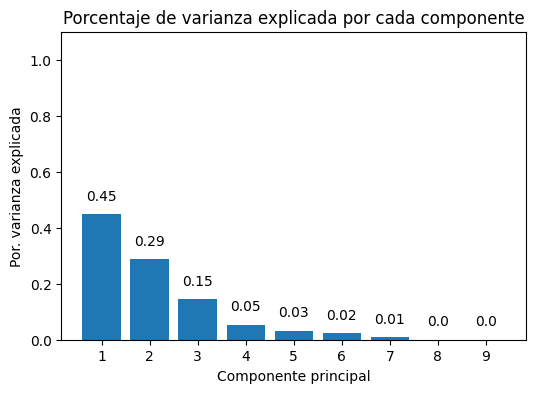

In [136]:
fig, ax=plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.bar(x=np.arange(modelo_pca.n_components_) + 1,
    height = modelo_pca.explained_variance_ratio_)

for x, y in zip(np.arange(len(df_num.columns)) + 1, modelo_pca.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(label,
                (x,y),
                textcoords="offset points",
                xytext=(0,10),
                ha='center')

ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_ylim(0, 1.1)
ax.set_title('Porcentaje de varianza explicada por cada componente')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza explicada');

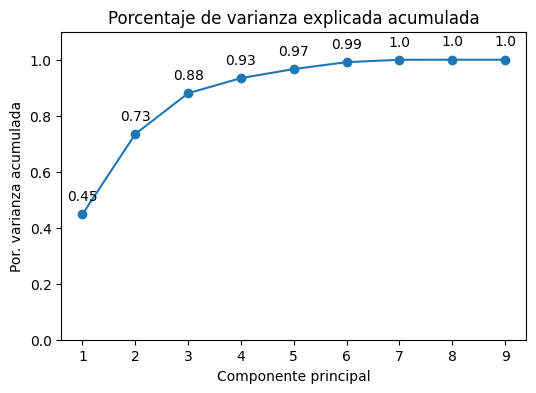

In [137]:
prop_varianza_acum = modelo_pca.explained_variance_ratio_.cumsum()
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.plot(np.arange(len(df_num.columns)) + 1,
        prop_varianza_acum,
        marker = 'o')

for x, y in zip(np.arange(len(df_num.columns)) + 1, prop_varianza_acum):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )
    
ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_title('Porcentaje de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza acumulada');

### ACP para la variable "title"

In [238]:
df_text = pd.read_pickle(FOLDER + "df_text_clean.pkl")

In [239]:
df_text = df_text.sample(45000)

In [240]:
len(df_text)

45000

In [241]:
df_text.tail()

,title,Y,clean_text
72727,[dvd pelicula original camp rock 2 envios gratis],used,[dvd pelicula original camp rock envios gratis]
50454,[french kiss beth roberts grijalbo libro de la...,used,[french kiss beth roberts grijalbo libro pelic...
63688,"[3 billetes china 1,2,5 jiao 1980]",used,[billetes china jiao]
83363,[valvula de seguridad eskabe art-10243/4 model...,new,[valvula seguridad eskabe art-10243/4 modelo a...
78951,"[carburador zanella 50 , juki 50, garelli 50 ,...",new,[carburador zanella juki garelli beta ciclo]


In [242]:
vectorizer = HashingVectorizer(n_features=8)

In [243]:
df_text["clean_text"] = [text[0] for text in df_text["clean_text"]]
type(df_text["clean_text"].iloc[0])

str

In [244]:
df_text.tail()

,title,Y,clean_text
72727,[dvd pelicula original camp rock 2 envios gratis],used,dvd pelicula original camp rock envios gratis
50454,[french kiss beth roberts grijalbo libro de la...,used,french kiss beth roberts grijalbo libro pelicu...
63688,"[3 billetes china 1,2,5 jiao 1980]",used,billetes china jiao
83363,[valvula de seguridad eskabe art-10243/4 model...,new,valvula seguridad eskabe art-10243/4 modelo ac...
78951,"[carburador zanella 50 , juki 50, garelli 50 ,...",new,carburador zanella juki garelli beta ciclo


In [258]:
df_text.to_pickle(FOLDER + "df_text_clean.pkl")

In [245]:
tfidf = vectorizer.fit_transform(list(df_text["clean_text"]))

In [246]:
tfidf_matrix = tfidf.toarray()

In [247]:
tfidf_matrix

array([[ 0.        ,  0.        ,  0.        , ...,  1.        ,
         0.        ,  0.        ],
       [ 0.5       ,  0.        , -0.5       , ...,  0.5       ,
         0.5       ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.70710678],
       ...,
       [ 0.        , -0.57735027,  0.        , ...,  0.57735027,
         0.        , -0.57735027],
       [-0.40824829,  0.        , -0.40824829, ..., -0.81649658,
         0.        ,  0.        ],
       [ 0.28867513,  0.8660254 ,  0.        , ...,  0.        ,
         0.        , -0.28867513]])

In [248]:
df_tfidf = pd.DataFrame(tfidf_matrix)

In [249]:
df_tfidf.head()

,0,1,2,3,4,5,6,7
0,0.000000,0.0,0.00000,0.000000,0.000000,1.000000,0.0,0.000000
1,0.500000,0.0,-0.50000,0.000000,0.000000,0.500000,0.5,0.000000
2,0.000000,0.0,0.00000,0.000000,-0.707107,0.000000,0.0,0.707107
3,0.000000,0.0,-0.57735,0.577350,0.000000,-0.577350,0.0,0.000000
4,-0.447214,0.0,0.00000,0.447214,0.447214,-0.447214,0.0,0.447214


In [250]:
pca_pipe = make_pipeline(PCA())
pca_pipe.fit(df_tfidf)
modelo_pca = pca_pipe.named_steps['pca']

In [251]:
pd.DataFrame(data=modelo_pca.components_,
             columns=df_tfidf.columns,
             index=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8'])

,0,1,2,3,4,5,6,7
PC1,-0.333845,0.504719,-0.146757,0.243962,0.073586,-0.027945,-0.720649,-0.164984
PC2,0.091334,-0.332525,0.400868,0.836385,0.070014,0.036524,-0.087144,0.083791
PC3,0.096989,-0.606810,0.066246,-0.378066,0.340292,-0.068120,-0.590904,0.073796
PC4,-0.686258,0.011923,0.430740,-0.127970,0.489313,0.006314,0.271730,-0.117009
PC5,0.601046,0.455149,0.218781,-0.042004,0.614968,0.039739,0.035962,0.029930
PC6,-0.030609,-0.185280,-0.502991,0.149305,0.316550,0.716049,0.100911,-0.257546
PC7,-0.083124,-0.098730,-0.569328,0.239077,0.393433,-0.616933,0.190420,0.174343
PC8,0.175348,-0.122834,0.053313,0.020487,-0.035753,-0.313518,0.048272,-0.921413


In [252]:
df_tfidf.tail()

,0,1,2,3,4,5,6,7
44995,0.000000,0.000000,0.000000,0.377964,0.377964,0.000000,0.755929,-0.377964
44996,0.000000,0.000000,0.000000,0.707107,0.000000,-0.707107,0.000000,0.000000
44997,0.000000,-0.577350,0.000000,0.000000,0.000000,0.577350,0.000000,-0.577350
44998,-0.408248,0.000000,-0.408248,0.000000,0.000000,-0.816497,0.000000,0.000000
44999,0.288675,0.866025,0.000000,0.000000,-0.288675,0.000000,0.000000,-0.288675


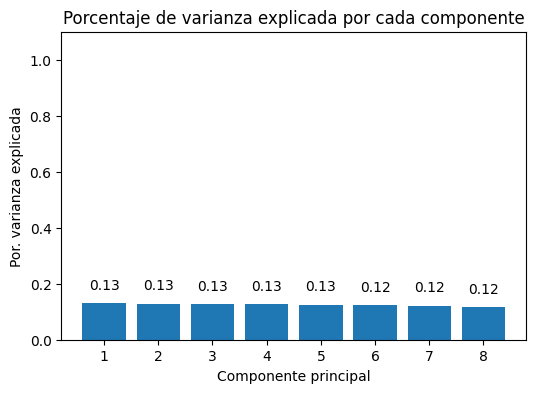

In [253]:
fig, ax=plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.bar(x=np.arange(modelo_pca.n_components_) + 1,
    height = modelo_pca.explained_variance_ratio_)

for x, y in zip(np.arange(len(df_tfidf.columns)) + 1, modelo_pca.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(label,
                (x,y),
                textcoords="offset points",
                xytext=(0,10),
                ha='center')

ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_ylim(0, 1.1)
ax.set_title('Porcentaje de varianza explicada por cada componente')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza explicada');

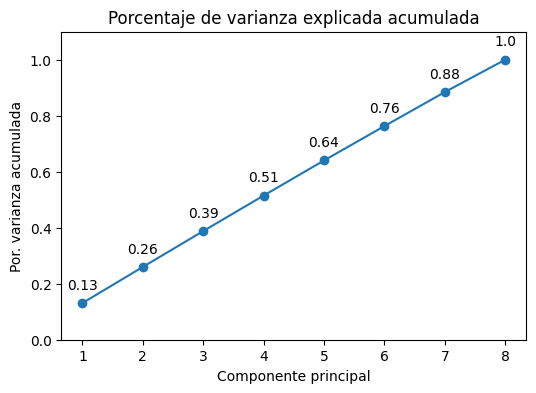

In [254]:
prop_varianza_acum = modelo_pca.explained_variance_ratio_.cumsum()
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.plot(np.arange(len(df_tfidf.columns)) + 1,
        prop_varianza_acum,
        marker = 'o')

for x, y in zip(np.arange(len(df_tfidf.columns)) + 1, prop_varianza_acum):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )
    
ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_title('Porcentaje de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza acumulada');

In [255]:
df_tfidf["Y"] = df_text["Y"]

In [256]:
df_tfidf.head()

,0,1,2,3,4,5,6,7,Y
0,0.000000,0.0,0.00000,0.000000,0.000000,1.000000,0.0,0.000000,NaN
1,0.500000,0.0,-0.50000,0.000000,0.000000,0.500000,0.5,0.000000,NaN
2,0.000000,0.0,0.00000,0.000000,-0.707107,0.000000,0.0,0.707107,NaN
3,0.000000,0.0,-0.57735,0.577350,0.000000,-0.577350,0.0,0.000000,NaN
4,-0.447214,0.0,0.00000,0.447214,0.447214,-0.447214,0.0,0.447214,NaN


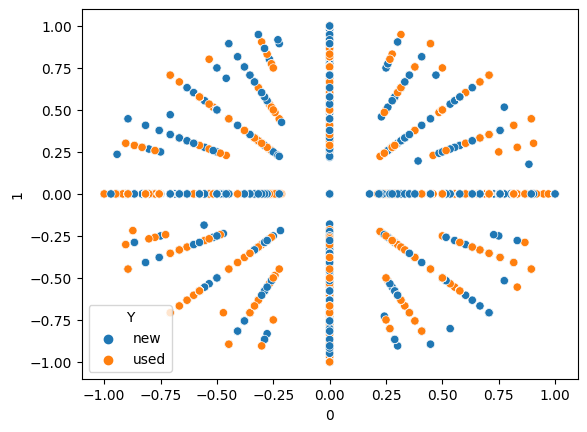

In [257]:
g =sns.scatterplot(x=0, y=1,
                  hue="Y",
                  data=df_tfidf);